# Initial analysis of buffer titrations

In [2]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse, dataframe
from q_dms_ttr_paper.paths import DATA_PATH

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [3]:
df = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")

## functions

In [4]:
def plot_pop_avg_traces_all(df, plot_sequence=False, ylim=None, **kwargs):
    fig, ax = plt.subplots(1, 1, **kwargs)
    for i, row in df.iterrows():
        if "label" in row:
            label = row["label"]
        else:
            label = row["rna_name"]
        plt.plot(row["data"], label=label, lw=4)
    #fig.legend(loc="upper left")
    if plot_sequence:
        seq = df.iloc[0]["sequence"]
        ss = df.iloc[0]["structure"]
        x = list(range(len(seq)))
        ax.set_xticks(x)
        ax.set_xticklabels([f"{s}\n{nt}" for s, nt in zip(seq, ss)])
    if ylim is not None:
        ax.set_ylim([0, ylim])
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)

    return fig

## dataframe info

In [5]:
df.columns

Index(['name', 'sequence', 'structure', 'data_type', 'num_reads', 'num_aligns',
       'data', 'no_mut', '1_mut', '2_mut', '3_mut', '3plus_mut', 'sn', 'dir',
       'rna_name', 'run_name', 'exp_name', 'code', 'length', 'barcode',
       'barcode_seq', 'buffer', 'buffer_conc', 'mg_conc', 'exp_type', 'gaaa',
       'gaaa_avg', 'tlr', 'ref_hp_1', 'ref_hp_1_as', 'ref_hp_2', 'ref_hp_2_as',
       'ires', 'kink_turn', '3x3_motif'],
      dtype='object')

In [6]:
df["rna_name"].unique()

array(['minittr-6-2HP-ref_0.3-M-NaCac', 'minittr-6-2HP-ref_0.25-M-NaCac',
       'minittr-6-2HP-ref_0.2-M-NaCac', 'minittr-6-2HP-ref_0.15-M-NaCac',
       'minittr-6-2HP-ref_0.1-M-NaCac', 'minittr-6-2HP-ref_0.05-M-NaCac',
       'minittr-6-2HP-ref_0.3-M-Hepes', 'minittr-6-2HP-ref_0.25-M-Hepes',
       'minittr-6-2HP-ref_0.2-M-Hepes', 'minittr-6-2HP-ref_0.15-M-Hepes',
       'minittr-6-2HP-ref_0.1-M-Hepes', 'minittr-6-2HP-ref_0.05-M-Hepes',
       'minittr-6-2HP-ref_0.3-M-KCl', 'minittr-6-2HP-ref_0.25-M-KCl',
       'minittr-6-2HP-ref_0.2-M-KCl', 'minittr-6-2HP-ref_0.15-M-KCl',
       'minittr-6-2HP-ref_0.1-M-KCl', 'minittr-6-2HP-ref_0.05-M-KCl',
       'minittr-6-2HP-ref_0.3-M-Tris', 'minittr-6-2HP-ref_0.25-M-Tris',
       'minittr-6-2HP-ref_0.2-M-Tris', 'minittr-6-2HP-ref_0.15-M-Tris',
       'minittr-6-2HP-ref_0.1-M-Tris', 'minittr-6-2HP-ref_0.05-M-Tris',
       'minittr-6-2HP-ref_100mM-NaC_40-mM-Mg',
       'minittr-6-2HP-ref_100mM-NaC_10-mM-Mg',
       'minittr-6-2HP-ref_100mM-NaC_

In [12]:
df["exp_name"].unique()

array(['2022_07_25_C0117_NaC_Hep_titra_CM_BL',
       '2022_07_26_C0117_KCl_Tris_titra_CM_BL',
       '2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL'], dtype=object)

### comparision between 300 mM and 50 mM NaCoc with 10 mM Mg2+

In [13]:
row1 = df[(df.buffer == 'NaCoc') & (df.buffer_conc == 300)].iloc[0]
row2 = df[(df.buffer == 'NaCoc') & (df.buffer_conc == 50)].iloc[0]

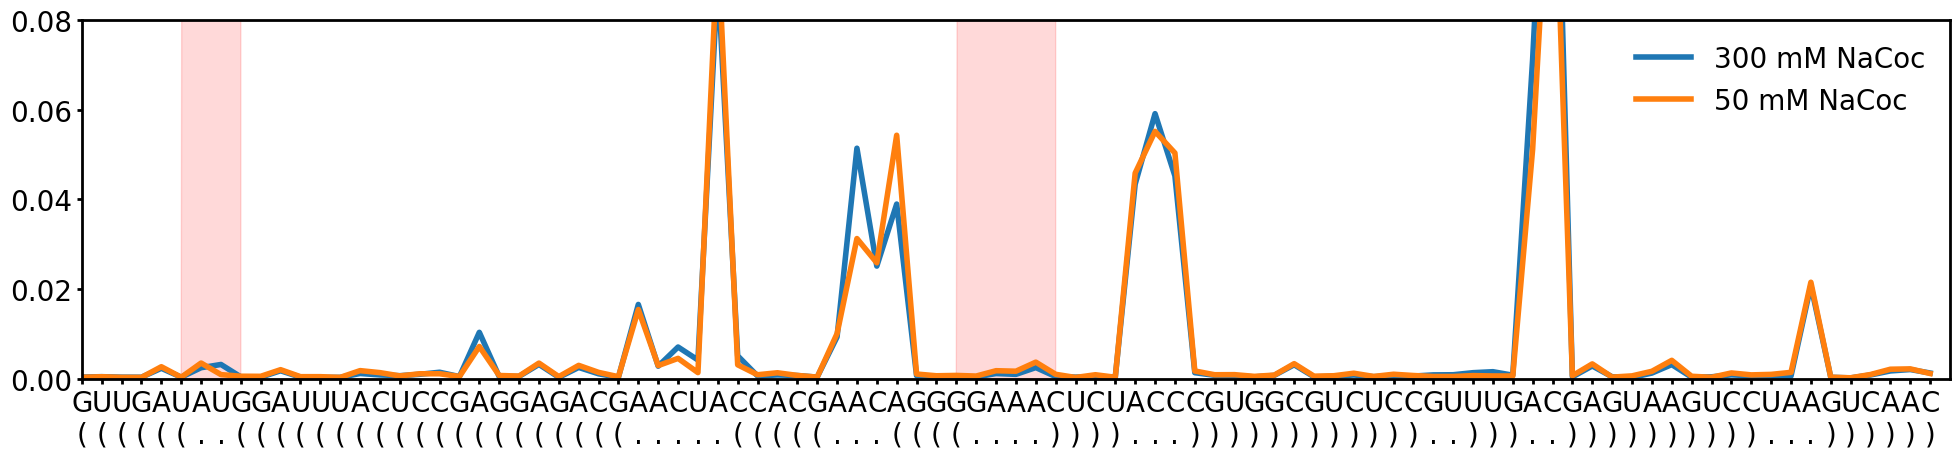

In [14]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = dataframe.trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["300 mM NaCoc", "50 mM NaCoc"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
plt.tight_layout()
plt.legend(loc='upper right', frameon=False)
x = range(0, len(df.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)


/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


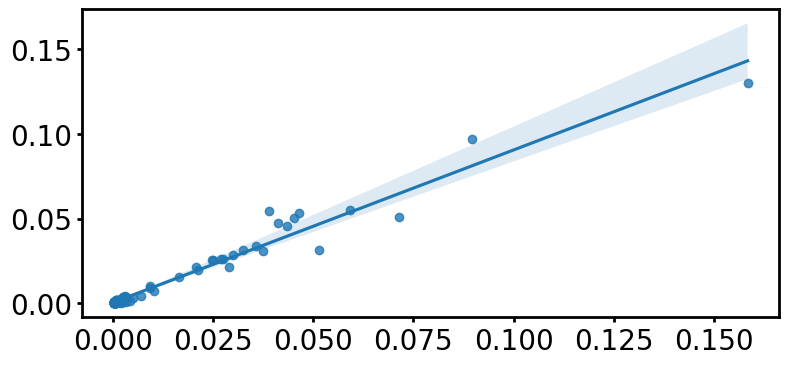

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.regplot(row1['data'], row2['data'], ax=ax)
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)

In [16]:
stats.pearsonr(row1['data'], row2['data'])[0] ** 2

0.9639808300465523

In [18]:
def plot_buffer_heatmap(df_sub):
    datas = []
    names = []
    for i, row1 in df_sub.iterrows():
        name = row1["buffer"] + "-" + str(row1["buffer_conc"])
        data = [name]
        names.append(name)
        for j, row2 in df_sub.iterrows():
            data.append(
                round(stats.pearsonr(row1["data"], row2["data"])[0] ** 2, 2)
            )
        datas.append(data)
    cols = ["name"]
    cols.extend(names)
    df_heat = pd.DataFrame(datas, columns=cols)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=600)
    g = sns.heatmap(
        (df_heat.set_index("name")),
        annot=True,
        cmap="viridis",
        ax=ax,
        annot_kws={"fontsize": 10},
    )
    # ensure y labels are not rotated!
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

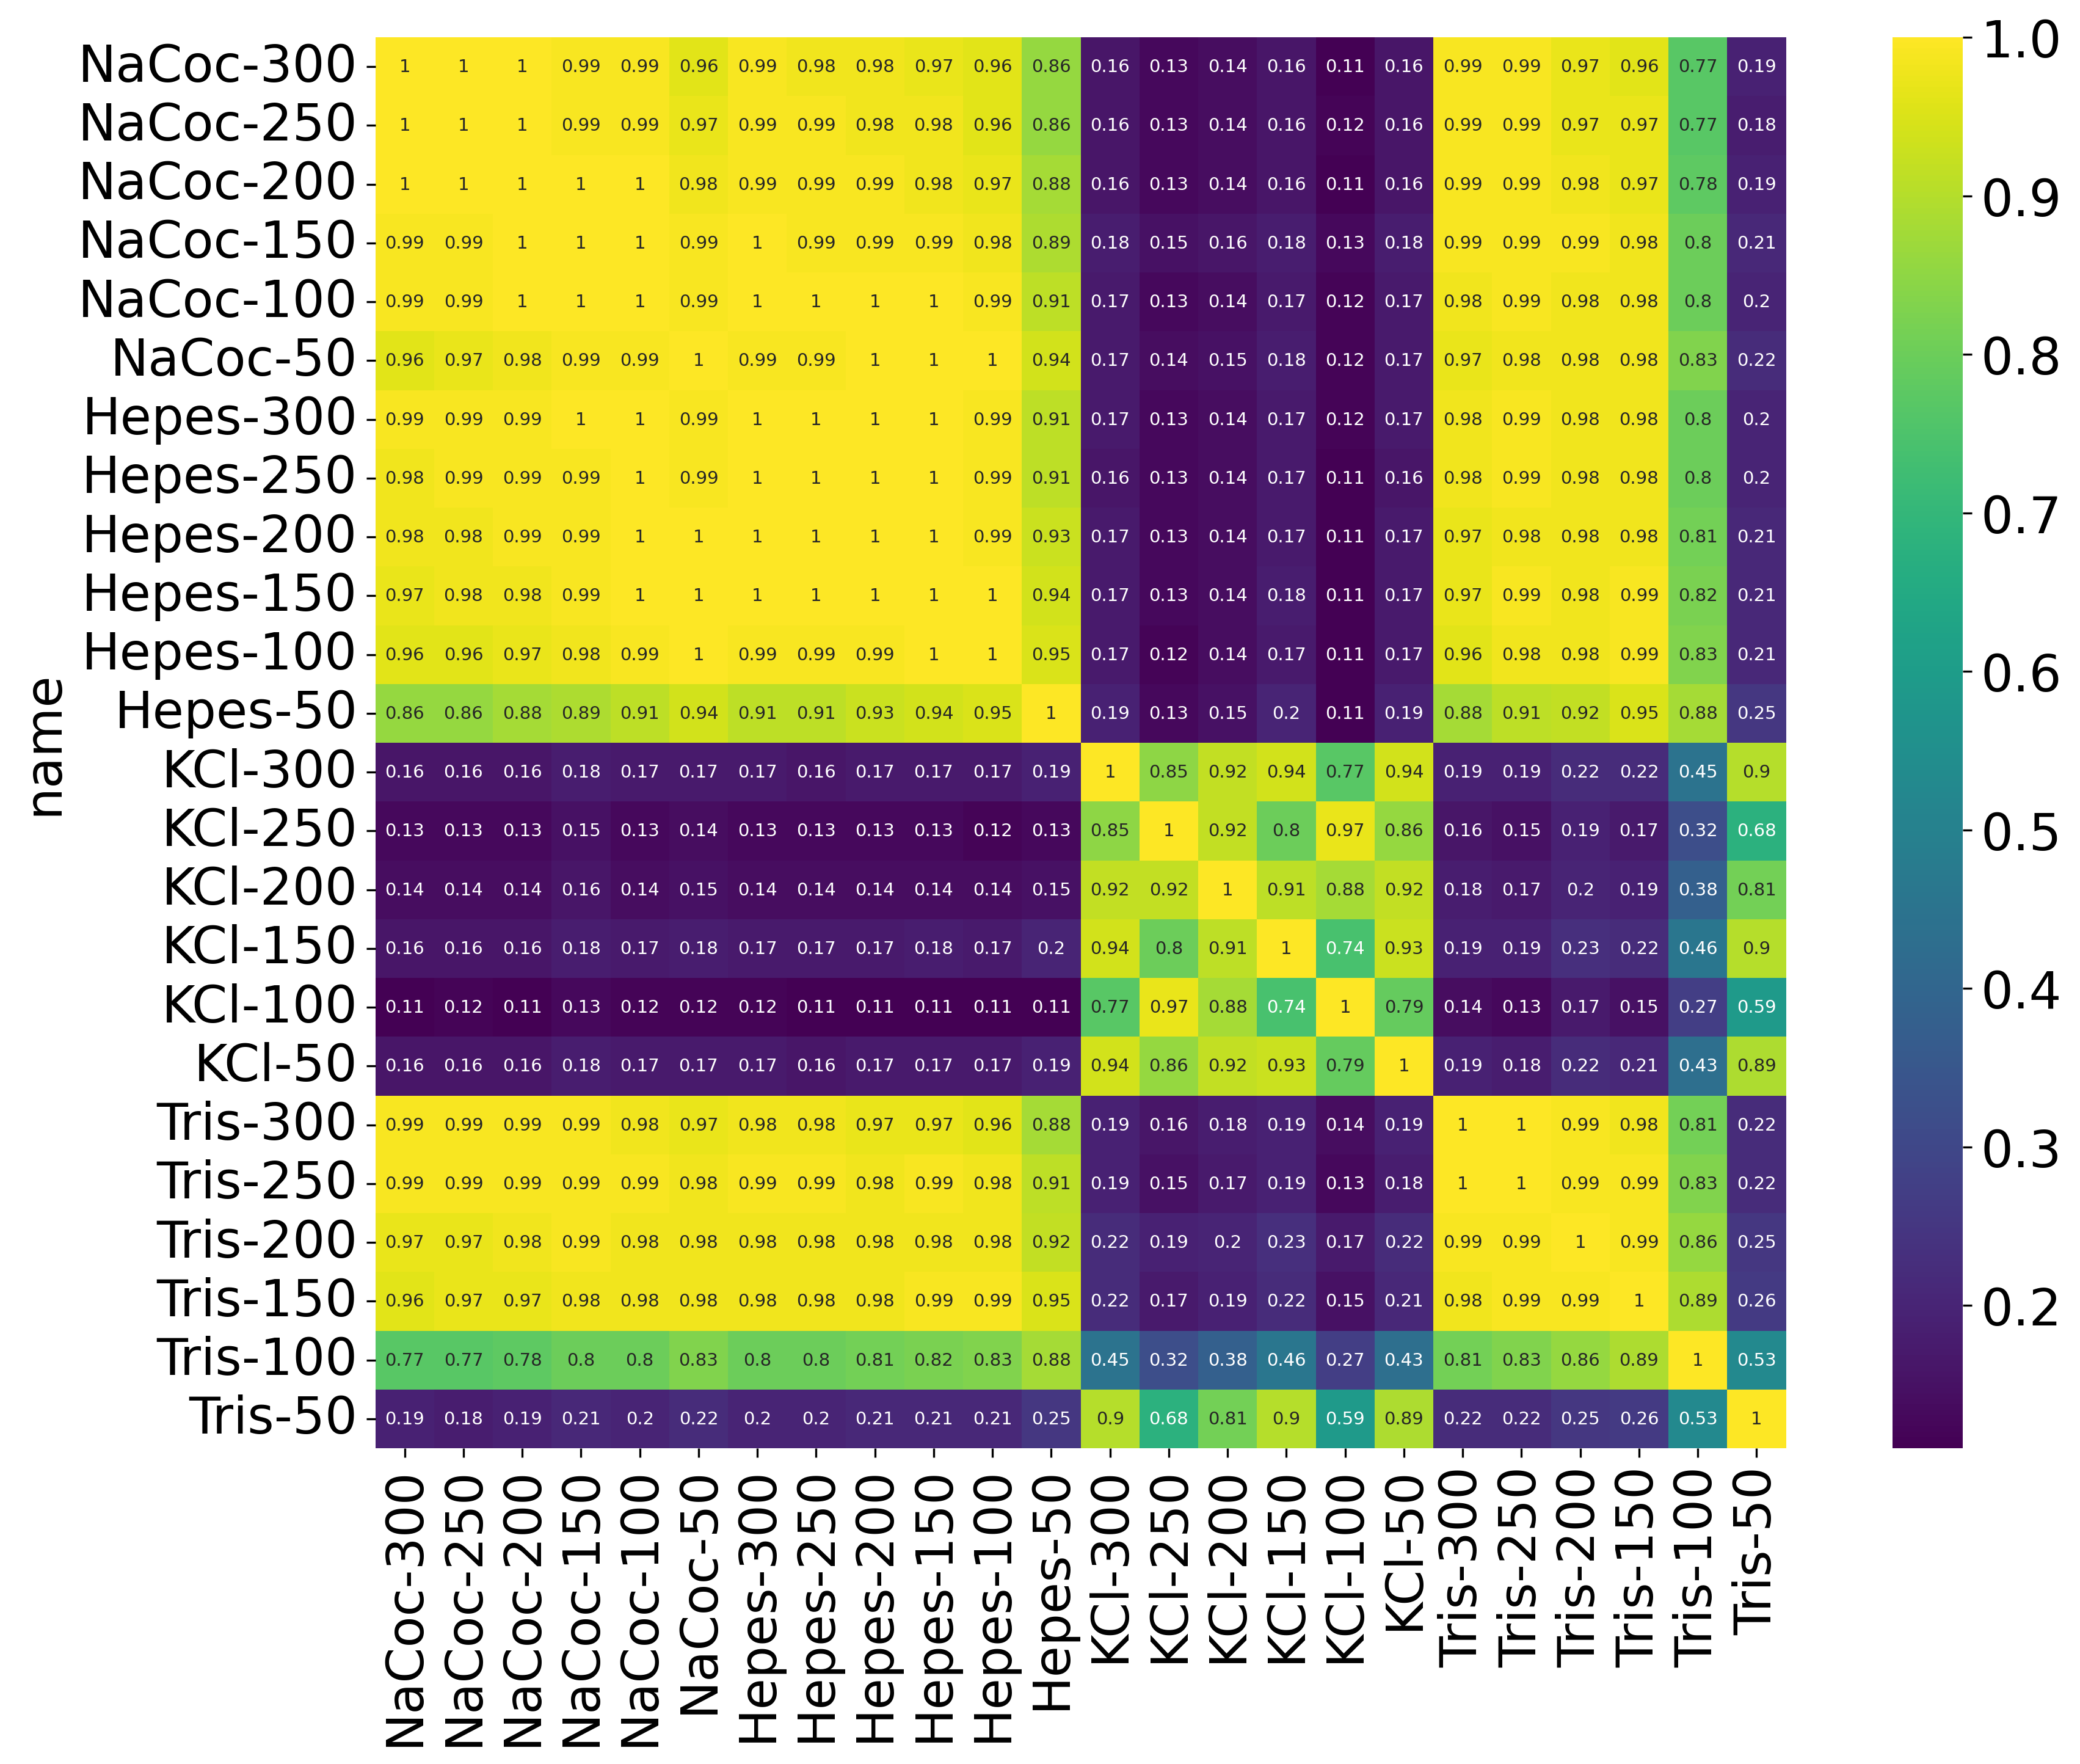

In [20]:
exp_names = [
    "2022_07_25_C0117_NaC_Hep_titra_CM_BL",
    "2022_07_26_C0117_KCl_Tris_titra_CM_BL",
]
dfs = []
for exp in exp_names:
    df_sub = df[df.exp_name == exp]
    dfs.append(df_sub)
df_sub = pd.concat(dfs)
datas = []
names = []
for i, row1 in df_sub.iterrows():
    name = row1['buffer'] + "-" + str(row1['buffer_conc'])
    data = [name]
    names.append(name)
    for j, row2 in df_sub.iterrows():
        data.append(round(stats.pearsonr(row1['data'], row2['data'])[0] ** 2, 2))
    datas.append(data)
cols = ['name']
cols.extend(names)
df_heat = pd.DataFrame(datas, columns=cols)
fig, ax = plt.subplots(dpi=300) 
g = sns.heatmap(
    (df_heat
     .set_index('name')), annot=True, cmap='viridis', ax=ax, annot_kws={"fontsize":7})
ax.set_aspect('equal')